# 1.1 PIL - The Python Imaging Library

PIL은 python imaging library란다.

http://www.pythonware.com/products/pil/

python3에서 PIL을 사용하려면 Pillow를 설치해야 했다.

In [1]:
from PIL import Image
pil_im = Image.open('./pics/nature.song-washington.jpg')
pil_im = Image.open('./pics/nature.song-washington.jpg').convert('L')

In [2]:
pil_im.save('./pics/nature.song-washington-L.jpg')

### Convert Images to Another Format

In [7]:
from PIL import Image
import os

filelist = ['/home/nature.song/study/perceive/pics/nature.song-versailles.jpg',
            '/home/nature.song/study/perceive/pics/nature.song-washington.jpg',
            '/home/nature.song/study/perceive/pics/nature.song-withwhitemask.jpg',
            '/home/nature.song/study/perceive/pics/walkingatoffice.jpg']

for infile in filelist:
    outfile = os.path.splitext(infile)[0] + "-copy.jpg"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("cannot convert", infile)

### Create Thumbnails

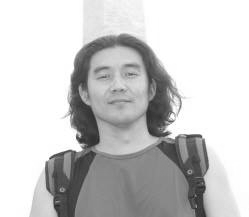

In [21]:
pil_im

In [22]:
pil_im.thumbnail((128,128))

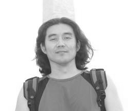

In [23]:
pil_im

### Copy and Paste Regions

In [36]:
box = (25,10,100,90)
region = pil_im.crop(box)

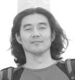

In [37]:
region

In [4]:
import os

def get_imlist(path):
    """
    """
    
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

In [7]:
imlist = get_imlist('./pics/')
imlist

['./pics/nature.song-withwhitemask.jpg',
 './pics/nature.song-versailles.jpg',
 './pics/nature.song-washington.jpg',
 './pics/nature.song-washington-L.jpg',
 './pics/walkingatoffice.jpg']

### Resize and Rotate

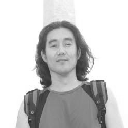

In [9]:
out = pil_im.resize((128,128))
out

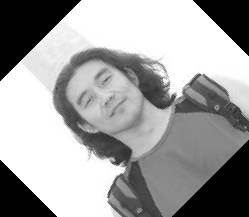

In [11]:
out = pil_im.rotate(45)
out

## 1.2 Matplotlib

Matplotlib는 그림그리는 좋은 도구란다.

### Plotting Images, Points, and Lines

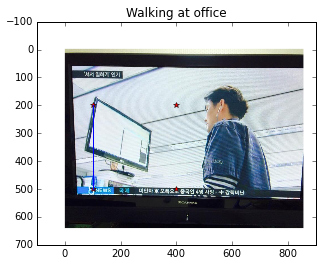

In [14]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# from numpy import *

im = array(Image.open('./pics/walkingatoffice.jpg'))
plt.imshow(im)

x = [100,100,400,400]
y = [200,500,200,500]

plt.plot(x,y, 'r*')

plt.plot(x[:2],y[:2])

plt.title('Walking at office')
plt.show()

(0.0, 1.0, 0.0, 1.0)

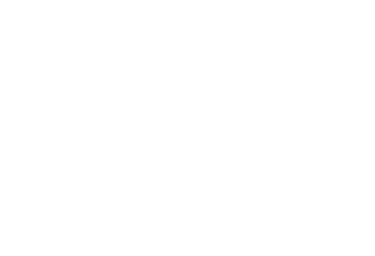

In [15]:
plt.axis('off')
# axis는 디버깅에 유용하지만 귀여운 그림을 위해서 삭제

### Image Contours and Histograms

Table 1-1. Basic color formatting commands for plotting with PyLab .

|Color||
|-|-|
|'b'|blue|
|'g'|green|
|'r'|red|
|'c'|cyan|
|'m'|magenta|
|'y'|yellow|
|'k'|black|
|'w'|white|


Table 1-2. Basic line stype formatting commands for plotting with PyLab .

|Line style||
|-|-|
|'-'|solid|
|'--'|dashed|
|':'|dotted|


Table 1-3. Basic plot marker formatting commands for plotting with PyLab .

|Marker||
|-|-|
|'.'|point|
|'o'|circle|
|'s'|square|
|'*'|star|
|'+'|plus|
|'x'|x|


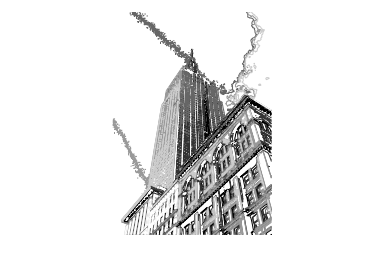

In [8]:
%matplotlib inline

from PIL import Image
from pylab import *

im = array(Image.open('./pics/empire.jpg').convert('L'))

figure()
gray()

contour(im, origin = 'image')
axis('equal')
axis('off')

show()

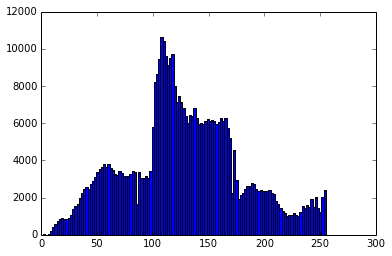

In [17]:
%matplotlib inline

figure()
hist(im.flatten(),128)
show()

### Interactive Annotation

In [1]:
# %matplotlib inline

from PIL import Image
from pylab import *

im = array(Image.open('./pics/empire.jpg'))
imshow(im)
print('Plz, click 3 points')
x = ginput(3)
print('U clicked: ', x)
show()

Plz, click 3 points
('U clicked: ', [(110.27551020408163, 209.70408163265301), (340.88775510204084, 215.82653061224494), (204.15306122448976, 456.64285714285711)])


/usr/lib/pymodules/python2.7/matplotlib/backend_bases.py:2407: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


## NumPy

### Array Image Rpresentation

In [2]:
im = array(Image.open('./pics/empire.jpg'))
print im.shape, im.dtype

im = array(Image.open('./pics/empire.jpg').convert('L'), 'f')
print im.shape, im.dtype

(800, 569, 3) uint8
(800, 569) float32


In [ ]:
value = im[i,j,k]

im[i,:] = im[j,:]
im[:,i] = 100
im[:100,:50].sum()
im[50:100,50:100]
im[i].mean()
im[:,-1]
im[-2,:] (or im[-2])

### Graylevel Transforms

numpy 객체에 읽어들이면 수학적 연산이 가능하다.

In [9]:
from PIL import Image
from numpy import *

im = array(Image.open('./pics/empire.jpg').convert('L'))
im2 = 255 - im
im3 = (100.0/255) * im + 100
im4 = 255.0 * (im/255.0)**2

In [11]:
print int(im.min()), int(im.max())
print int(im2.min()), int(im2.max())
print int(im3.min()), int(im3.max())
print int(im4.min()), int(im4.max())

2 255
0 253
100 200
0 255


In [12]:
pil_im = Image.fromarray(im)

In [15]:
pil_im = Image.fromarray(uint8(im))

### Histogram Equalization

그래이 레벨 변환의 유용한 예가 히스토그램 이퀄라이제이션이다.

In [9]:

def histeq(im,nbr_bins=256):
    """    Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    
    return im2.reshape(im.shape), cdf
    


In [10]:
from PIL import Image
from numpy import *
# import imtools

im = array(Image.open('./pics/AquaTermi_lowcontrast.JPG').convert('L'))
im2, cdf = histeq(im)

### Averaging Images

In [11]:


def compute_average(imlist):
    """    Compute the average of a list of images. """
    
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f') 

    skipped = 0
    
    for imname in imlist[1:]:
        try: 
            averageim += array(Image.open(imname))
        except:
            print imname + "...skipped"  
            skipped += 1

    averageim /= (len(imlist) - skipped)
    
    # return average as uint8
    return array(averageim, 'uint8')



In [12]:
# import imtools

compute_average(['./pics/empire.jpg','./pics/AquaTermi_lowcontrast.JPG'])

./pics/AquaTermi_lowcontrast.JPG...skipped


array([[[ 88, 133, 188],
        [ 86, 131, 186],
        [ 86, 131, 186],
        ..., 
        [247, 248, 250],
        [246, 247, 249],
        [246, 247, 249]],

       [[ 89, 134, 189],
        [ 88, 133, 188],
        [ 88, 133, 188],
        ..., 
        [246, 247, 249],
        [246, 247, 249],
        [246, 247, 251]],

       [[ 88, 135, 189],
        [ 87, 134, 188],
        [ 86, 133, 187],
        ..., 
        [245, 246, 250],
        [245, 246, 250],
        [246, 247, 251]],

       ..., 
       [[130, 177, 231],
        [131, 178, 232],
        [131, 178, 232],
        ..., 
        [ 35,  40,  36],
        [ 36,  41,  37],
        [ 35,  41,  37]],

       [[130, 177, 231],
        [131, 178, 232],
        [131, 178, 232],
        ..., 
        [ 36,  41,  37],
        [ 39,  44,  40],
        [ 37,  43,  39]],

       [[128, 178, 231],
        [130, 180, 233],
        [128, 178, 231],
        ..., 
        [ 37,  42,  38],
        [ 37,  42,  38],
        [ 35,  41,

### PCA of Images

PCA를 적용하려면 1차 벡터로 변환해야 한다. flatten()으로 가능
SVD를 통해서 차원 축소를 한다.

In [20]:
from PIL import Image
from numpy import *

def pca(X):
    """ Principal Component Analysis
    input: X, matrix with training data stored as flattened arrays in rows
    return: projection matrix (with important dimensions first), variance
    and mean."""

    # get dimensions
    num_data,dim = X.shape
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if dim>num_data:
        # PCA - compact trick used
        M = dot(X,X.T) # covariance matrix
        e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T # this is the compact trick
        V = tmp[::-1] # reverse since last eigenvectors are the ones we want
        S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
        for i in range(V.shape[1]):
            V[:,i] /= S
    else:
        # PCA - SVD used
        U,S,V = linalg.svd(X)
        V = V[:num_data] # only makes sense to return the first num_data

    # return the projection matrix, the variance and the mean
    return V,S,mean_X

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt


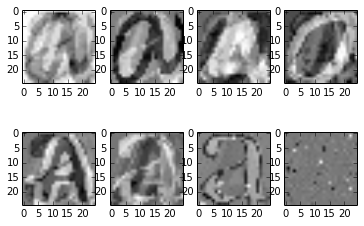

In [28]:
%matplotlib inline

from PIL import Image
from numpy import *
from pylab import *
# import pca

imlist = ['./pcv_data/data/a_thumbs/1_t.jpg',
          './pcv_data/data/a_thumbs/2_t.jpg',
          './pcv_data/data/a_thumbs/3_t.jpg',
          './pcv_data/data/a_thumbs/4_t.jpg',
          './pcv_data/data/a_thumbs/5_t.jpg',
          './pcv_data/data/a_thumbs/6_t.jpg',
          './pcv_data/data/a_thumbs/7_t.jpg',
          './pcv_data/data/a_thumbs/8_t.jpg']

im = array(Image.open(imlist[0])) # open one image to get size
m,n = im.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open(im)).flatten()
    for im in imlist],'f')

# perform PCA
V,S,immean = pca(immatrix)

# show some images (mean and 7 first modes)
figure()
gray()
subplot(2,4,1)
imshow(immean.reshape(m,n))
for i in range(7):
    subplot(2,4,i+2)
    imshow(V[i].reshape(m,n))

show()

### Using the Pickle Module

In [30]:
import pickle

# save mean and principal components
f = open('font_pca_modes.pkl', 'wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()

In [31]:
import pickle

# load mean and principal components
f = open('font_pca_modes.pkl', 'rb')
immean = pickle.load(f)
V = pickle.load(f)
f.close()

In [33]:
# open file and save
with open('font_pca_modes1.pkl', 'wb') as f:
    pickle.dump(immean,f)
    pickle.dump(V,f)

In [34]:
# open file and load
with open('font_pca_modes1.pkl', 'rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)

In [41]:
from numpy import *

x = arange(1)

savetxt('test.txt',x)
x = loadtxt('test.txt')

## 1.4 SciPy

### Blurring Images

I σ = I ∗ G σ ,

- Iσ: 블러드 이미지
- I: 이미지
- ∗: 컨벌루션
- Gσ: 가우스 커널

Gσ = (1/(2π σ))exp−(x2 +y2 )/2σ2

In [44]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('./pics/empire.jpg').convert('L'))
im2 = filters.gaussian_filter(im,5)

In [47]:
im = array(Image.open('./pics/empire.jpg'))
im2 = zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],5)
im2 = uint8(im2)
# im2 = array(im2,'uint8')

### Image Derivatives

이산 근사를 사용하여 이미지 도함수를 계산할 수 있다. 컨벌루션으로 구현된다.

Prewitt filters

Dx

||||
|-|-|-|
|-1|0|1|
|-1|0|1|
|-1|0|1|


Dy

||||
|-|-|-|
|-1|-1|-1|
|0|0|0|
|1|1|1|


Sobel filters

Dx

||||
|-|-|-|
|-1|0|1|
|-2|0|2|
|-1|0|1|


Dy

||||
|-|-|-|
|-1|-2|-1|
|0|0|0|
|1|2|1|


In [51]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = array(Image.open('./pics/empire.jpg').convert('L'))

# Sobel derivative filters
imx = zeros(im.shape)
filters.sobel(im,1,imx)

imy = zeros(im.shape)
filters.sobel(im,0,imy)

magnitude = sqrt(imx**2+imy**2)

이런 접근법은 이미지 해상도가 결정하는 스케일에서 도함수를 가져오는 결함을 가지고 있다.

이미지 노이즈를 더 강건하게 하고 일정 스케일로 도함수를 계산하기 위해서 Gaussian derivative filters를 사용한다.

I x = I ∗ G σ x and I y = I ∗ G σy ,

G σ x 와 G σy 는 분산σ를 갖는 가우시안 함수Gσ의 x and y 도함수이다.

In [52]:
sigma = 5 # standard deviation
imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)

### Morphology—Counting Objects

수학적 형태학은 디지털 이미지에서 많이 사용된다.

In [56]:
from scipy.ndimage import measurements,morphology
# load image and threshold to make sure it is binary
im = array(Image.open('./pcv_data/data/houses.png').convert('L'))
im = 1*(im<128)
labels, nbr_objects = measurements.label(im)
print "Number of objects:", nbr_objects

Number of objects: 45


In [57]:
# morphology - opening to separate objects better
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2)
labels_open, nbr_objects_open = measurements.label(im_open)
print "Number of objects:", nbr_objects_open

Number of objects: 48


### Useful SciPy Modules

#### Reading and writing .mat files

In [ ]:
data = scipy.io.loadmat('test.mat')

In [ ]:
data = {}
data['x'] = x
scipy.io.savemat('test.mat',data)

#### Saving arrays as images

In [59]:
from scipy.misc import imsave
imsave('test.jpg',im)

In [69]:
from scipy.misc import lena
lena = lena()

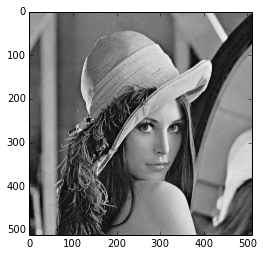

In [72]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(lena)
plt.show()

## 1.5 Advanced Example: Image De-Noising

Rudin-Osher-Fatemi de-noising 모델을 사용한다. (ROF)

ROF 모델의 기저 수학과 해결 기법은 엄청 진보하고 이책의 범위 밖이다.

ROF는 Chambolle의 알고리즘에 기반한다.

The total variation (TV) of a (grayscale) image I is defined as the sum of the gradient
norm. In a continuous representation, this is

J (I ) = integral |∇I |dx.

J (I ) = sigma x |∇I |,

x = [x,y]

ROF의 Chambolle 버전에서 비노이즈된 이미지를 찾는 과정을
minU ||I − U || 2 + 2λJ (U )
를 통해서 구한다.

In [73]:
from numpy import *

def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """ An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    using the numerical procedure presented in eq (11) A. Chambolle (2005).
    Input: noisy input image (grayscale), initial guess for U, weight of
    the TV-regularizing term, steplength, tolerance for stop criterion.
    Output: denoised and detextured image, texture residual. """

    m,n = im.shape # size of noisy image

    # initialize
    U = U_init
    Px = im # x-component to the dual field
    Py = im # y-component of the dual field
    error = 1

    while (error > tolerance):
        Uold = U

        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U's gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U's gradient

        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))

        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)

        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable

        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);

    return U,im-U # denoised image and texture residual



In [76]:
from numpy import *
from numpy import random
from scipy.ndimage import filters

import rof

# create synthetic image with noise
im = zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
im = im + 30*random.standard_normal((500,500))

U,T = rof.denoise(im,im)
G = filters.gaussian_filter(im,10)

# save the result
from scipy.misc import imsave
imsave('synth_rof.pdf',U)
imsave('synth_gaussian.pdf',G)

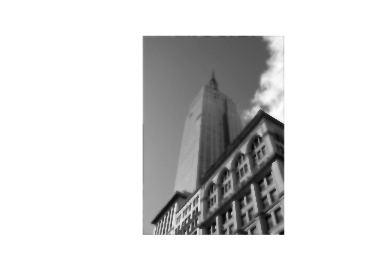

In [78]:
from PIL import Image
from pylab import *
import rof

im = array(Image.open('./pics/empire.jpg').convert('L'))
U,T = rof.denoise(im,im)

figure()
gray()
imshow(U)
axis('equal')
axis('off')
show()